In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
# Loading dataset
df = pd.read_csv("ML case Study.csv",header = 0)
df_Colleges = pd.read_csv("Colleges.csv",header = 0)
df_Cities = pd.read_csv("cities.csv",header = 0)

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
df_Colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
df_Cities

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode
5,Hyderabad,Rajpur Sonarpur
6,Ahmedabad,Kolhapur
7,Pune,Ajmer
8,Surat,NaN


## Data-Preprocessing
#### Creating lists

In [6]:
T1 = df_Colleges["Tier 1"].tolist()

In [7]:
T2 = df_Colleges["Tier 2"].tolist()

In [8]:
T3 = df_Colleges["Tier 3"].tolist()

#### Categorizing Colleges

In [9]:
for item in df.College:
    if item in T1:
        df["College"].replace(item,1,inplace = True)
    elif item in T2:
        df["College"].replace(item,2,inplace = True)
    elif item in T3:
        df["College"].replace(item,3,inplace = True)

In [10]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,Asansol,Manager,55523.0,3,66,19,71406.58
1,2,Ajmer,Executive,57081.0,1,84,18,68005.87
2,3,Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,3,Ajmer,Executive,49010.0,2,81,33,82092.39
4,1,Durgapur,Executive,57879.0,4,74,32,73878.10


#### Categorizing Cities

In [11]:
M = df_Cities["Metrio City"].tolist()

In [12]:
NM = df_Cities["non-metro cities"].tolist()

In [13]:
for city in df.City:
    if city in M:
        df["City"].replace(city,1,inplace = True)
    elif city in NM:
        df["City"].replace(city,0,inplace = True)

In [14]:
df.head(10)

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,2,0,Manager,55523.0,3,66,19,71406.58
1,2,0,Executive,57081.0,1,84,18,68005.87
2,3,0,Executive,60347.0,2,52,28,76764.02
3,3,0,Executive,49010.0,2,81,33,82092.39
4,1,0,Executive,57879.0,4,74,32,73878.10
5,2,0,Executive,54340.0,4,73,31,59950.89
6,3,1,Executive,60298.0,1,42,46,66602.34
7,2,1,Executive,49944.0,2,56,37,57768.44
8,3,1,Executive,53124.0,4,40,37,70083.30
9,1,0,Executive,51141.0,1,47,60,85648.48


#### Creating dummy variables for "Role" column

In [15]:
df = pd.get_dummies(df)

In [16]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,0,1
1,2,0,57081.0,1,84,18,68005.87,1,0
2,3,0,60347.0,2,52,28,76764.02,1,0
3,3,0,49010.0,2,81,33,82092.39,1,0
4,1,0,57879.0,4,74,32,73878.10,1,0


In [17]:
# finding shape
df.shape

(1589, 9)

In [18]:
#Analyzing the information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Executive       1589 non-null   uint8  
 8   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(2)
memory usage: 90.1 KB


In [19]:
#Finding number of unique values in each columns
df.nunique()

College                   3
City                      2
Previous CTC           1307
Previous job change       4
Graduation Marks         51
EXP (Month)              47
CTC                    1338
Role_Executive            2
Role_Manager              2
dtype: int64

In [20]:
# Checking  if there is any duplicate value
df.duplicated().sum()

46

In [21]:
#Removing duplicate data from df
df.drop_duplicates(inplace=True)

#### Cheacking Missing Values

In [22]:
df.isnull().sum()

College                0
City                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
Role_Executive         0
Role_Manager           0
dtype: int64

#### Checking for Outliers

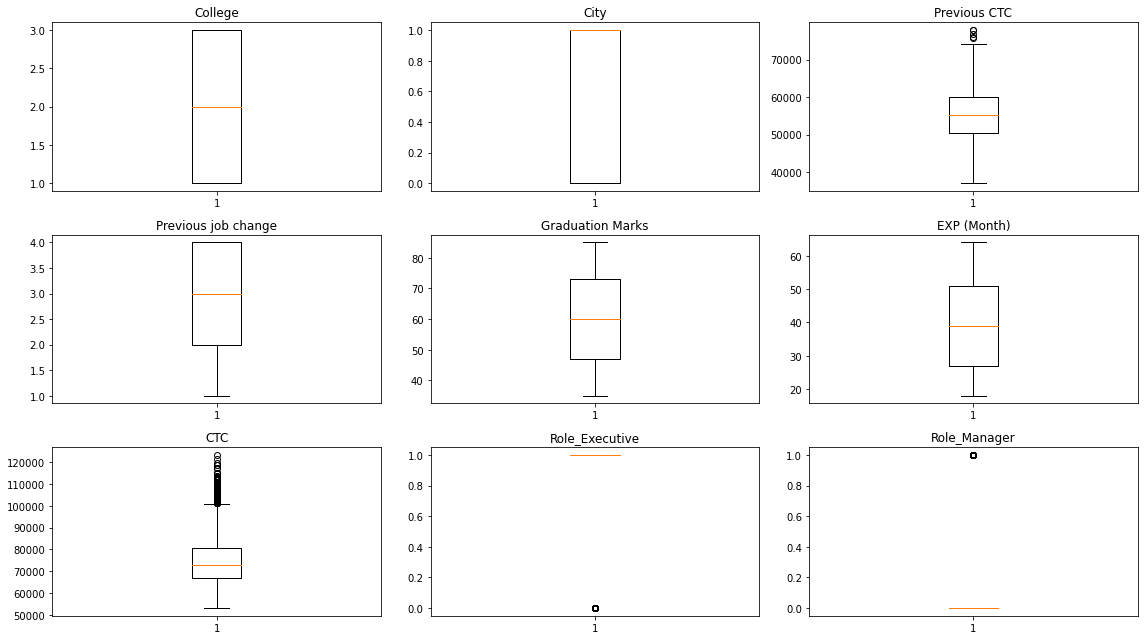

In [23]:
# Plot box plots for each numerical column
plt.figure(figsize=(16,9))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.savefig("Outliers plot")
plt.show()

## ML Models 
#### 1 : Multi Linear Regression
 * Using Statsmodels
 * Using Sklearn

In [24]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Executive,Role_Manager
College,1.000000,-0.014132,0.041470,-0.059729,0.004344,0.009064,-0.026282,0.012903,-0.012903
City,-0.014132,1.000000,0.000010,0.058553,-0.014316,-0.020581,-0.013014,0.043584,-0.043584
Previous CTC,0.041470,0.000010,1.000000,0.010004,-0.027740,0.121437,0.262554,-0.016814,0.016814
Previous job change,-0.059729,0.058553,0.010004,1.000000,0.020345,0.022416,0.005110,0.025111,-0.025111
Graduation Marks,0.004344,-0.014316,-0.027740,0.020345,1.000000,-0.054128,-0.004035,-0.021289,0.021289
EXP (Month),0.009064,-0.020581,0.121437,0.022416,-0.054128,1.000000,0.295916,0.026618,-0.026618
CTC,-0.026282,-0.013014,0.262554,0.005110,-0.004035,0.295916,1.000000,-0.623223,0.623223
Role_Executive,0.012903,0.043584,-0.016814,0.025111,-0.021289,0.026618,-0.623223,1.000000,-1.000000
Role_Manager,-0.012903,-0.043584,0.016814,-0.025111,0.021289,-0.026618,0.623223,-1.000000,1.000000


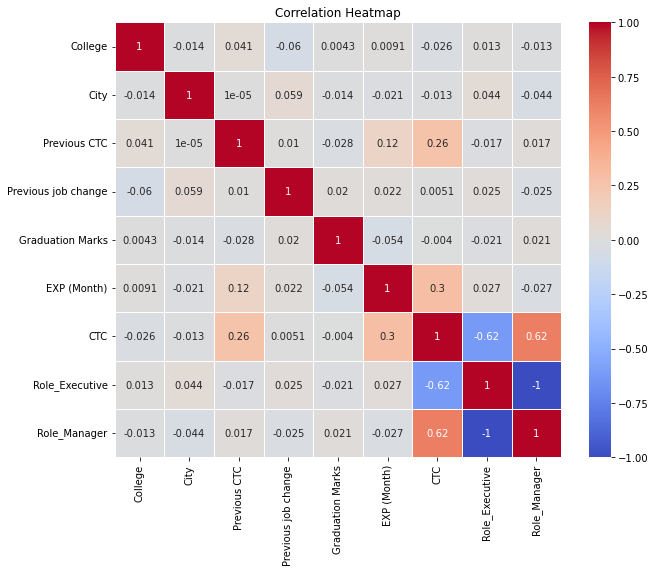

In [25]:
# Creating a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig("Correlation heatmap")
plt.show()

In [26]:
X_multi = df.loc[:, df.columns !="CTC"]

In [27]:
X_multi.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager
0,2,0,55523.0,3,66,19,0,1
1,2,0,57081.0,1,84,18,1,0
2,3,0,60347.0,2,52,28,1,0
3,3,0,49010.0,2,81,33,1,0
4,1,0,57879.0,4,74,32,1,0


In [28]:
y_multi = df['CTC']

In [29]:
y_multi.head()

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
Name: CTC, dtype: float64

In [30]:
X_multi_cons = sn.add_constant(X_multi)

In [31]:
X_multi_cons.head()

,const,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Executive,Role_Manager
0,1.0,2,0,55523.0,3,66,19,0,1
1,1.0,2,0,57081.0,1,84,18,1,0
2,1.0,3,0,60347.0,2,52,28,1,0
3,1.0,3,0,49010.0,2,81,33,1,0
4,1.0,1,0,57879.0,4,74,32,1,0


In [32]:
m1_multi_stats = sn.OLS(y_multi, X_multi_cons).fit()

In [33]:
m1_multi_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     251.3
Date:                Thu, 30 May 2024   Prob (F-statistic):          3.13e-249
Time:                        22:32:34   Log-Likelihood:                -16166.
No. Observations:                1543   AIC:                         3.235e+04
Df Residuals:                    1535   BIC:                         3.239e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 3.22e+04   1480.515     21.748      0.000    2.93e+04    3.51e+04
College              -437.3046    263.247     -1.661      0.097    -953.666      79.057
City                  487.1791    439.891      1.107      0.268    -375.672    1350.030
Previous CTC            0.4117      0.033     12.425      0.000       0.347       0.477
Previous job change   104.2279    196.034      0.532      0.595    -280.294     488.750
Graduation Marks        3.7065     14.725      0.252      0.801     -25.177      32.590
EXP (Month)           256.7858     15.752     16.302      0.000     225.888     287.683
Role_Executive       6358.4879    768.627      8.273      0.000    4850.817    7866.159
Role_Manager         2.584e+04    807.444     32.003      0.000    2.43e+04    2.74e+04
==============================================================================
Omnibus:                       49.798   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.893
Skew:                           0.411   Prob(JB):                     7.29e-13
Kurtosis:                       3.440   Cond. No.                     2.37e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.57e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
m1_multi_lr = LinearRegression()

In [35]:
m1_multi_lr.fit(X_multi, y_multi)

LinearRegression()

In [36]:
print(m1_multi_lr.intercept_, m1_multi_lr.coef_)

48298.29235699719 [-4.37304600e+02  4.87179053e+02  4.11669166e-01  1.04227907e+02
  3.70647623e+00  2.56785755e+02 -9.74094292e+03  9.74094292e+03]


In [37]:
y_pred = m1_multi_lr.predict(X_multi)

In [38]:
mse = mean_squared_error(y_multi,y_pred)
r2 = r2_score(y_multi,y_pred)

In [39]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  73765335.88090034 
R2 Score - 0.534006614380651


##### Note : Since Our Dependent variable is continuous such that Classification methods are not applicable.

#### 2 : Decision Tree Regressor

In [40]:
X = df.loc[:,df.columns!="CTC"]

In [41]:
y = df["CTC"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [43]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(1234, 8) (309, 8) (1234,) (309,)


In [44]:
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [45]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [46]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

In [48]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  67929108.89346938 
R2 Score - 0.6019663730145539


In [49]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= X_train.columns, filled = True)

#### 3 : Random Forest Regressor

In [50]:
rf = RandomForestRegressor(n_estimators=250, random_state=42)  

In [51]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [52]:
predictions = rf.predict(X_test)

In [53]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [54]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  61924754.89679597 
R2 Score - 0.6371491516190623


#### 4 Gradient Boosting Machines Regressor

In [55]:
model = GradientBoostingRegressor(n_estimators = 250, learning_rate = 0.1, max_depth = 4, random_state = 0)

In [56]:
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=250, random_state=0)

In [57]:
pred = model.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test,pred)

In [59]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  63531782.60740258 
R2 Score - 0.6277327014589107


#### 5 Ridge Regression

##### Standardizing

In [60]:
scaler = StandardScaler()

In [61]:
scaler.fit(X_train)

StandardScaler()

In [62]:
X_train_s = scaler.transform(X_train)

In [63]:
X_test_s = scaler.transform(X_test)

In [64]:
lm_r = Ridge(alpha = 0.5)

In [65]:
lm_r.fit(X_train_s,y_train)

Ridge(alpha=0.5)

In [66]:
y_pred = lm_r.predict(X_test_s)

In [67]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [68]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  79774472.58454593 
R2 Score - 0.5325579389908567


#### Changing Hyper Parameters 

In [69]:
from sklearn.model_selection import validation_curve

In [70]:
param_range = np.logspace(-2,8,100)

In [71]:
train_scores, test_scores = validation_curve(
  Ridge(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [72]:
train_mean = np.mean(train_scores, axis = 1)

In [73]:
test_mean = np.mean(test_scores, axis = 1)

In [74]:
max(test_mean)

0.5173891550342682

In [75]:
np.where(test_mean == max(test_mean))

(array([35], dtype=int64),)

In [76]:
param_range[30]

10.722672220103231

In [77]:
lm_r_best = Ridge(alpha = param_range[30])

In [78]:
lm_r_best.fit(X_train_s,y_train)

Ridge(alpha=10.722672220103231)

###### so the optimum value of alpha is 10.722672220103231

In [79]:
y_pred_best = lm_r.predict(X_test_s)

In [80]:
r2_score(y_test,y_pred_best)

0.5325579389908567

#### 6 Lasso Regression

In [81]:
lm_s = Lasso(alpha = 0.5)

In [82]:
lm_s.fit(X_train_s,y_train)

Lasso(alpha=0.5)

In [83]:
y_pred = lm_s.predict(X_test_s)

In [84]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [85]:
print("Mean Squared Error - ",mse,"\nR2 Score -",r2)

Mean Squared Error -  79772449.15821673 
R2 Score - 0.5325697953471944


#### Changing Hyper Parameters

In [86]:
from sklearn.model_selection import validation_curve

In [87]:
param_range = np.logspace(-2,8,100)

In [88]:
train_scores, test_scores = validation_curve(
  Lasso(),
  X_train_s, 
  y_train,
  param_name ="alpha",
  param_range = param_range,
  scoring = "r2"
)

In [89]:
train_mean = np.mean(train_scores, axis = 1)

In [90]:
test_mean = np.mean(test_scores, axis = 1)

In [91]:
max(test_mean)

0.5175529939132335

In [92]:
np.where(test_mean == max(test_mean))

(array([40], dtype=int64),)

In [93]:
param_range[36]

43.28761281083057

In [94]:
lm_s_best = Lasso(alpha = param_range[36])

In [95]:
lm_s_best.fit(X_train_s,y_train)

Lasso(alpha=43.28761281083057)

###### so the optimum value of alpha is 43.28761281083057

In [96]:
y_pred_best = lm_s.predict(X_test_s)

In [97]:
r2_score(y_test,y_pred_best)

0.5325697953471944

# Questions and Answers

#### Q.1 Views About the problem statement?

##### Ans - The problem statement outlines the significant business challenge of determining the salaries for newly hired employees.
##### TechWorks Consulting focuses on various factors, including:
* College attended
* City
* Previous CTC (Cost to Company)
* Previous job changes
* Graduation marks
* Experience in months
* Role within the company
##### Utilizing machine learning, specifically regression, represents a progressive approach to automate and enhance salary prediction using the provided dataset.

#### Q.2 What will be your approach to solving this task?

##### Ans - 
##### 1) Data Preprocessing:
* **Missing Values**: After analyzing the provided dataset, it was confirmed that there are no missing values.
* **Outliers**: Visualization of the dataset using scatter plots revealed no significant outliers.
* **Categorical Variables**: The dataset contains categorical columns such as "College," "City," and "Role." The college and city data are provided in a separate dataset, which was loaded using pandas. These columns were converted into lists and categorized accordingly. The "Role" column was categorized by creating dummy variables.

##### 2) Modeling:
* **Model Selection**: Various regression models were evaluated, including Linear Regression, Ridge Regression, Lasso Regression, Decision Tree Regression and Random Forest Regression
* **Evaluation**: The dataset was split into training, validation, and test sets. The model performance was evaluated using metrics such as Mean Squared Error (MSE), R-Squared, and Adjusted R-Squared on the validation set.
* **Tuning and Optimization**: Parameters like learning rate and the number of trees/estimators were fine-tuned to achieve optimal performance.

##### 3) Predictive Analysis:
* **Final Model Optimization**: The optimized model was used to predict salaries for new employees based on their features. The predictions were analyzed, and the model's coefficients were interpreted to understand which features had the most significant impact on salary.
* **Performance Monitoring**: The model's performance was monitored over time by tracking metrics such as R-Squared.

#### Q.3 What were the available ML model options you had to perform this task?

##### Ans - Available ML Model Options:
* Linear Regression
* Decision tree Regressor
* Random Forest Regressor
* Gradient Boosting Machine Regressor
* Ridge Regression
* Lasso Regression

#### Q.4 Which model’s performance is best and what could be the possible reason for that?

##### Ans - Random Forest Regressor is the best model for this dataset in order to predict the salaries for newly hired employees.
##### Reason - It is giving maximum accuracy or maximum r2 score as compared to other models that's why Random Forest Regressor is considered as the  best ml model for predicting the salaries for newly hired employees.
##### Accuracies or R2_scores of ML models:-
* Linear Regression                   -          0.534006614380651
* Ridge Regression                    -          0.5325579389908567
* Lasso Regression                    -          0.5325697953471944
* Decision Tree Regression            -          0.6019663730145537
* Random Forest Regression            -          0.6371491516190623
* Gradient Boosting Machine Regressor -          0.6277327014589107
##### As mentioned above Random Forest Regressor having the maximum R2_score of 0.6371491516190623, hence Random Forest Regressor is considered as the best ML model for the provided dataset.

#### Q.5 What steps can you take to improve this selected model’s performance even further?

##### Ans - Steps that can be taken in order to improve the model performance :-
* Gathering More Data: Acquiring additional data, if possible, will enhance the model's ability to generalize to new, unseen data.
* Hyperparameter Tuning: Fine-tuning the model's hyperparameters ensures optimal performance and better prediction accuracy.
* Ensemble Methods: Combining multiple well-performing models using techniques such as stacking, boosting, or bagging can improve overall accuracy.
* Early Stopping: Implementing early stopping during training can prevent overfitting by halting the training process when the model's performance on the validation set begins to decline.
* Feature Importance Analysis: Analyzing feature importance scores helps identify which features have the most significant impact on salary predictions, allowing for better feature selection and model refinement.